## Feed Forward (MLP) Neural Networks

### Neural Networks
#### Neural networks are a series of algorithms that identify underlying relationships in a set of data. These algorithms are heavily based on the way a human brain operates. These networks can adapt to changing input and generate the best result without the requirement to redesign the output criteria.  Deep learning algorithms are based on neural networks.

#### Neural Networks Components:

- an input layer that receives data and pass it on
- a hidden layer
- an output layer
- weights between the layers
- a deliberate activation function for every hidden layer

#### Pros 
- 
-

#### Cons
- 
-

### Model Set Up

#### Steps
 - load the data
 - inspect, clean, organize data
 - check for, handle outliers 
 - encode data if necessary 
 - set features and target 
 - train, test split the data 
 - scale the data if necessary 
 - build, compile the model, fit the data, evaluate the model 
 - run metrics, analyze, view results, adjust parameters, repeat until satisfied... 


### Neural Network Models

#### Multilayer Perceptrons (MLP), feed forward
1 single neuron model that is a precursor to a larger neural network of neurons
 - feedforward, often need back-propagation, which provides the network with corresponding set of inputs and outputs. When the input data is transmitted into the neuron, it is processed, and an output is generated.
 - 3 layers, nodes/input layer, hidden layer, output layer
 - in hidden and the output layers, every node is considered as a neuron with a nonlinear activation function
 - supervised learning technique called backpropagation for training, adjusts weights of neurons
 - most ideal for projects involving tabular datasets, classification prediction problems, and regression prediction problems




### Models

#### Import + Inspect 

In [ ]:
from tensorflow.keras.datasets import mnist # load the fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() # split data for X train, y train

In [ ]:
X_train[25] # show the array for 25

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  83,
         91, 143, 255, 190,  91,  50,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  49, 180, 246,
        253, 253, 253, 253, 253, 220, 154,  17,   3,   0,   0,   0,   0,
          0,   0],
       [  

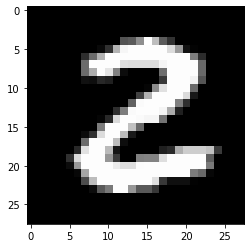

In [ ]:
### show what image the array makes ###
import matplotlib.pyplot as plt 
plt.imshow(X_train[25], cmap='gray')

#### Reshape + Encode 

In [ ]:
### reshape the data ### 
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
### set X variable types to float ### 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
### set classes, convert vectors to binary class matrix ###
num_classes = 10
from tensorflow import keras 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### (MLP) Feed Forward Neural Network
 - GridSearch CV 
 - RandomizedSearch CV

In [ ]:
from tensorflow import keras 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.activations import relu, sigmoid
from sklearn.model_selection import cross_val_score

seed = 7
np.random.seed(seed) # random seed for reproducability
### create the model ###
model = Sequential() # initiate the model 
model.add(Dense(50, input_dim=784, activation='relu')), # input layer, set dimension
model.add(Dropout(0.1)), # set a drop out 
model.add(Dense(100, activation='relu')), # hidden layer
model.add(Dropout(0.1)), # set a drop out 
model.add(Dense(50, activation='relu')), # hidden layer
model.add(Dense(10, activation='sigmoid')) # output layer 
model.compile( # compile the model 
              optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy']
              )
### show summary ### 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 49,910
Trainable params: 49,910
Non-trainable params: 0
____________________________________________________

In [ ]:
print('--- model runtime ---')
%time history = model.fit(X_train, y_train, batch_size=20, epochs=50, validation_split=.1, verbose=False) # fit the model 
scores = model.evaluate(X_test, y_test) # get the model score from evaluation
print(f'model accuracy = {scores[1]*100}') # show the models accuracy score 

--- model runtime ---
CPU times: user 5min 2s, sys: 26.4 s, total: 5min 28s
Wall time: 3min 37s
313/313 [==============================] - 1s 2ms/step - loss: 0.2164 - accuracy: 0.9577
model accuracy = 95.77000141143799


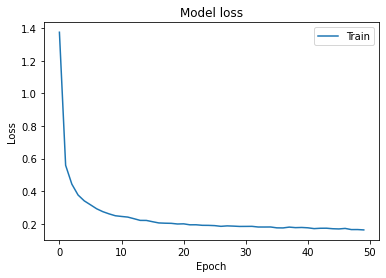

In [ ]:
import matplotlib.pyplot as plt
### plot the loss-MSE value ###
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

##### GridSearch CV 

In [ ]:
### parameter tuning options ###
'''
- tune 1-2 parameters at a time 
- add parameters to model function input
- set the list of values for the parameter in the model 
- add the parameter to the param_grid dictionary
'''
# def create_model(optimizer='rmsprop', init='glorot_uniform',dropout_rate=0.0, weight_constraint=0, activation='relu', learn_rate=0.01, momentum=0, neurons=1)
# optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'] # network weight initializer, will change with choice of activation function 
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'], # controls the non-linearity of individual neurons and when to fire, 'sigmoid' last layer for 0-1 value outputs
# epochs = [10, 50, 100] # no model input necessary, how many times the model will run 
# batch_size = [5, 10, 20] # no model input necessary, # of samples to run in each epoch
# learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3] # combine with momentum, use SGD optimizer, how much to update the weight after each batch  
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9] # combine with learn_rate, use SGD optimizer
# optimizer = SGD(lr=learn_rate, momentum=momentum)
# weight_constraint = [1, 2, 3, 4, 5] # combine with dropout 
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # combine with weight_constraint
# neurons = [1, 5, 10, 15, 20, 25, 30]
# param_grid = dict(batch_size=batch_size, epochs=epochs, batch_size=batch_size, learn_rate=learn_rate, momentum=momentum, weight_constraint=weight_constraint, dropout_rate=dropout_rate, neurons)

'\n- tune 1-2 parameters at a time \n- add parameters to model function input\n- set the list of values for the parameter in the model \n- add the parameter to the param_grid dictionary\n'

In [ ]:
from tensorflow import keras 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.losses import categorical_crossentropy
from keras.activations import relu, sigmoid
from sklearn.model_selection import cross_val_score
### create model function ###
def create_model():
    model = Sequential() # initiate the model 
    model.add(Dense(50, input_dim=784, activation='relu')), # input layer 
    model.add(Dropout(0.1)), # set a drop out 
    model.add(Dense(100, activation='relu')), # hidden layer
    model.add(Dropout(0.1)), # set a drop out 
    model.add(Dense(50, activation='relu')), # hidden layer
    model.add(Dense(10, activation='sigmoid')) # output layer        
    model.compile( # compile the model 
                  optimizer = 'adam', # uses stochaastic gradient descent, auto tunes itself
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'] # for classification use accuracy
                 )

    return model

seed = 7 
np.random.seed(seed) # random seed for reproducibility
model1 = KerasClassifier(build_fn=create_model)
### set parameters to tune ### 
epochs = [10]
batch_size = [5, 10, 20]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model1, param_grid=param_grid, verbose = 1)
print('--- model runtime ---')
%time grid.fit(X_train, y_train)
### model metrics ###
print('--- metrics ---')
print("score:", (grid.best_score_))
print('--- best parameters ---')
for param, value in grid.best_params_.items():
    print('\t{}: {}'.format(param, value))

--- model runtime ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
9600/9600 [==============================] - 19s 2ms/step - loss: 2.2682 - accuracy: 0.6675
Epoch 2/10
9600/9600 [==============================] - 17s 2ms/step - loss: 0.5260 - accuracy: 0.8610
Epoch 3/10
9600/9600 [==============================] - 17s 2ms/step - loss: 0.4348 - accuracy: 0.8812
Epoch 4/10
9600/9600 [==============================] - 18s 2ms/step - loss: 0.3987 - accuracy: 0.8954
Epoch 5/10
9600/9600 [==============================] - 18s 2ms/step - loss: 0.3592 - accuracy: 0.9034
Epoch 6/10
9600/9600 [==============================] - 18s 2ms/step - loss: 0.3448 - accuracy: 0.9103
Epoch 7/10
9600/9600 [==============================] - 18s 2ms/step - loss: 0.3283 - accuracy: 0.9145
Epoch 8/10
9600/9600 [==============================] - 18s 2ms/step - loss: 0.3235 - accuracy: 0.9137
Epoch 9/10
9600/9600 [==============================] - 18s 2ms/step - loss: 0.3202 - accuracy: 0.9168
Epoch 10/10
2400/2400 [==============================] - 3s 1ms/step - lo

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 28.2min finished


3000/3000 [==============================] - 7s 2ms/step - loss: 2.5574 - accuracy: 0.6416
Epoch 2/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4511 - accuracy: 0.8740
Epoch 3/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3622 - accuracy: 0.8981
Epoch 4/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3076 - accuracy: 0.9116
Epoch 5/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2742 - accuracy: 0.9210
Epoch 6/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2560 - accuracy: 0.9276
Epoch 7/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2498 - accuracy: 0.9278
Epoch 8/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2320 - accuracy: 0.9329
Epoch 9/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2231 - accuracy: 0.9355
Epoch 10/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2036 - accurac

In [ ]:
from tensorflow import keras 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.activations import relu, sigmoid
from sklearn.model_selection import cross_val_score

seed = 7
np.random.seed(seed) # random seed for reproducability
### create the model ###
model = Sequential() # initiate the model 
model.add(Dense(50, input_dim=784, activation='relu')), # input layer, set dimension
model.add(Dropout(0.1)), # set the drop out 
model.add(Dense(100, activation='relu')), # hidden layer
model.add(Dropout(0.1)), # set the drop out 
model.add(Dense(50, activation='relu')), # hidden layer
model.add(Dense(10, activation='sigmoid')) # output layer 
model.compile( # compile the model 
              optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy']
              )
### show summary ### 
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 50)                39250     
_________________________________________________________________
dropout_34 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_35 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_71 (Dense)             (None, 10)                510       
Total params: 49,910
Trainable params: 49,910
Non-trainable params: 0
_________________________________________________

In [ ]:
print('--- model runtime ---')
%time history = model.fit(X_train, y_train, batch_size=20, epochs=10, validation_split=.1, verbose=False) # fit the model 
scores = model.evaluate(X_test, y_test) # get the model score from evaluation
print(f'model accuracy = {scores[1]*100}') # show the models accuracy score 

--- model runtime ---
CPU times: user 1min 4s, sys: 5.58 s, total: 1min 10s
Wall time: 47.5 s
313/313 [==============================] - 1s 2ms/step - loss: 0.1736 - accuracy: 0.9550
model accuracy = 95.49999833106995


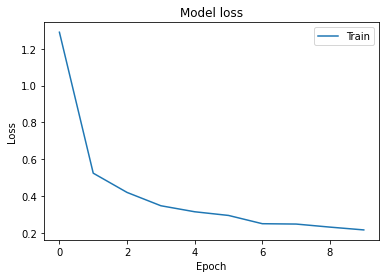

In [ ]:
import matplotlib.pyplot as plt
### plot the loss-MSE value ###
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

##### RandomSearch CV 

In [ ]:
### parameter tuning options ###
'''
- tune 1-2 parameters at a time 
- add parameters to model function input
- set the list of values for the parameter in the model 
- add the parameter to the param_grid dictionary
'''
# def create_model(optimizer='rmsprop', init='glorot_uniform',dropout_rate=0.0, weight_constraint=0, activation='relu', learn_rate=0.01, momentum=0, neurons=1)
# optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'] # network weight initializer, will change with choice of activation function 
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'], # controls the non-linearity of individual neurons and when to fire, 'sigmoid' last layer for 0-1 value outputs
# epochs = [10, 50, 100] # no model input necessary, how many times the model will run 
# batch_size = [5, 10, 20] # no model input necessary, # of samples to run in each epoch
# learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3] # combine with momentum, use SGD optimizer, how much to update the weight after each batch  
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9] # combine with learn_rate, use SGD optimizer
# optimizer = SGD(lr=learn_rate, momentum=momentum)
# weight_constraint = [1, 2, 3, 4, 5] # combine with dropout 
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # combine with weight_constraint
# neurons = [1, 5, 10, 15, 20, 25, 30]
# param_grid = dict(batch_size=batch_size, epochs=epochs, batch_size=batch_size, learn_rate=learn_rate, momentum=momentum, weight_constraint=weight_constraint, dropout_rate=dropout_rate, neurons)

'\n- tune 1-2 parameters at a time \n- add parameters to model function input\n- set the list of values for the parameter in the model \n- add the parameter to the param_grid dictionary\n'

In [19]:
from tensorflow import keras 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.optimizers import Adam, Nadam, RMSprop
from keras.losses import categorical_crossentropy
from keras.activations import relu, sigmoid
from sklearn.model_selection import cross_val_score
### create a model function ### 
def create_model(optimizers):
    model = Sequential()
    model.add(Dense(50, input_dim=784, activation='relu')), # input layer 
    model.add(Dropout(0.1)), # set the drop out 
    model.add(Dense(100, activation='relu')), # hidden layer
    model.add(Dropout(0.1)), # set the drop out 
    model.add(Dense(50, activation='relu')), # hidden layer
    model.add(Dense(10, activation='sigmoid')) # output layer        
    model.compile(
                  optimizer = optimizers, # tuning 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'] # for classification use accuracy
                 )

    return model

seed = 7
np.random.seed(seed) # random seed for reproducibility
model1 = KerasClassifier(build_fn=create_model) # initiate the model
### set parameters to tune ### 
optimizers = ['rmsprop', 'adam', 'Nadam'] # tune new parameter 
epochs = [10] # set the epoch 
batch_size = [20] # set the batch size
param_grid = dict(optimizers = optimizers, batch_size = batch_size, epochs = epochs) # create the param dict
random = RandomizedSearchCV(model1, param_distributions = param_grid, n_jobs=-1, verbose=1) # initiate the model 
print('--- model runtime ---')
%time random.fit(X_train, y_train) # fit the data
### model metrics ###
print('--- metrics ---')
print("score:", (random.best_score_)) # show the score 
print('--- best parameters ---')
for param, value in random.best_params_.items(): # show the best params
    print('\t{}: {}'.format(param, value))

--- model runtime ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.4min finished


Epoch 1/10
3000/3000 [==============================] - 7s 2ms/step - loss: 3.0491 - accuracy: 0.6287
Epoch 2/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4446 - accuracy: 0.8787
Epoch 3/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3259 - accuracy: 0.9128
Epoch 4/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2692 - accuracy: 0.9264
Epoch 5/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2353 - accuracy: 0.9355
Epoch 6/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2091 - accuracy: 0.9420
Epoch 7/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2027 - accuracy: 0.9449
Epoch 8/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1890 - accuracy: 0.9476
Epoch 9/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1747 - accuracy: 0.9530
Epoch 10/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.165

In [21]:
from tensorflow import keras 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.activations import relu, sigmoid
from sklearn.model_selection import cross_val_score

seed = 7
np.random.seed(seed) # random seed for reproducibility
### create the model ### 
model = Sequential() # initiate the model 
model.add(Dense(50, input_dim=784, activation='relu')), # input layer 
model.add(Dropout(0.1)), # set drop out 
model.add(Dense(100, activation='relu')), # hidden layer
model.add(Dropout(0.1)), # set drop out 
model.add(Dense(50, activation='relu')), # hidden layer
model.add(Dense(10, activation='sigmoid')) # output layer 
model.compile( # compile the model 
              optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy']
              )
### show summary ### 
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 50)                39250     
_________________________________________________________________
dropout_42 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_43 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_87 (Dense)             (None, 10)                510       
Total params: 49,910
Trainable params: 49,910
Non-trainable params: 0
_________________________________________________

In [22]:
print('--- model runtime ---')
%time history = model.fit(X_train, y_train, batch_size=20, epochs=10, validation_split=.1, verbose=False) # fit the model 
scores = model.evaluate(X_test, y_test) # get the model score from evaluation
print(f'model accuracy = {scores[1]*100}') # show the models accuracy score 

--- model runtime ---
CPU times: user 1min 2s, sys: 5.62 s, total: 1min 7s
Wall time: 45.3 s
313/313 [==============================] - 1s 2ms/step - loss: 0.1824 - accuracy: 0.9544
model accuracy = 95.44000029563904


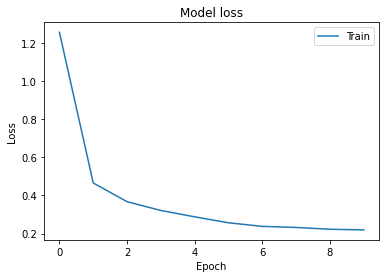

In [23]:
import matplotlib.pyplot as plt
### plot the loss-MSE value ###
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()